In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy as sc
import sklearn as sk

In [2]:
home = os.getcwd()
print(os.listdir(home))

['.git', '.gitignore', '.ipynb_checkpoints', '01-08-19-V118', '01-08-19-V118_ch1.dat', '01-08-19-V118_ch2.dat', '03-05-19-V118', '03-26-19-V118', '08-14-18-V118', '08-14-18-V118_ch1.dat', '08-14-18-V118_ch2.dat', 'data_prep.ipynb', 'data_prep_development.ipynb', 'data_prep_final.ipynb', 'EDA.ipynb', 'EDA2.ipynb', 'eda2_b.ipynb', 'EDA3.ipynb', 'GPS Files', 'July 6, 2020 Vehicle 118 Expo Line Test Train Data.xlsx', 'REC0001_ch1.dat', 'REC0001_ch2.dat', 'REC0002_ch1.dat', 'REC0002_ch2.dat', 'Skytrain Linear Asset Database - Consolidated.xlsx', 'SMC DATALOG FOR MAR. 5 TEST TRAIN 118-6.xlsx', 'Switch Maint Works to date - April 2019.xlsx', 'Test Train Sample Noise Data', 'Test Train Sample Noise Data.zip']


In [3]:
df = pd.read_csv("REC0001_ch1.dat", index_col = 0)
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 6.0 MB
None
                 0           10           20           30           40  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.004057     0.002701     0.004694     0.005262     0.006621   
std       0.008427     0.005516     0.008015     0.008609     0.010234   
min       0.000526     0.000140     0.000104     0.000080     0.000072   
25%       0.001194     0.000334     0.000213     0.000167     0.000142   
50%       0.001543     0.000707     0.001213     0.001563     0.002236   
75%       0.002896     0.003506     0.006749     0.007300     0.009508   
max       0.184814     0.201660     0.186462     0.163122     0.135074   

                50           60           70           80           90  ...  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000  ...   
mean      0.006121 

0        10        20        30        40        50        60  \
0  0.001609  0.000450  0.000286  0.000167  0.000151  0.000127  0.000106   
1  0.001758  0.000274  0.000251  0.000161  0.000157  0.000120  0.000110   
2  0.001389  0.000288  0.000171  0.000158  0.000107  0.000118  0.000092   
3  0.001315  0.000237  0.000181  0.000144  0.000134  0.000138  0.000081   
4  0.001686  0.000267  0.000198  0.000187  0.000127  0.000233  0.000238   

         70        80        90  ...      2500      2510      2520      2530  \
0  0.000109  0.000107  0.000076  ...  0.000022  0.000015  0.000018  0.000016   
1  0.000095  0.000075  0.000086  ...  0.000019  0.000015  0.000020  0.000016   
2  0.000096  0.000092  0.000101  ...  0.000021  0.000023  0.000019  0.000014   
3  0.000129  0.000068  0.000075  ...  0.000022  0.000017  0.000018  0.000014   
4  0.000104  0.000084  0.000131  ...  0.000017  0.000017  0.000014  0.000017   

       2540      2550  mean_acc    median    95_acc   max_acc  
0  0.000016  0.000023  0.007904  0.006931  0.018558  0.028211  
1  0.000024  0.000014  0.008869  0.008714  0.017975  0.027030  
2  0.000016  0.000011  0.007368  0.006656  0.016424  0.025582  
3  0.000025  0.000015  0.006382  0.005798  0.014314  0.023695  
4  0.000021  0.000017  0.007763  0.007311  0.016251  0.028942  

[5 rows x 260 columns]

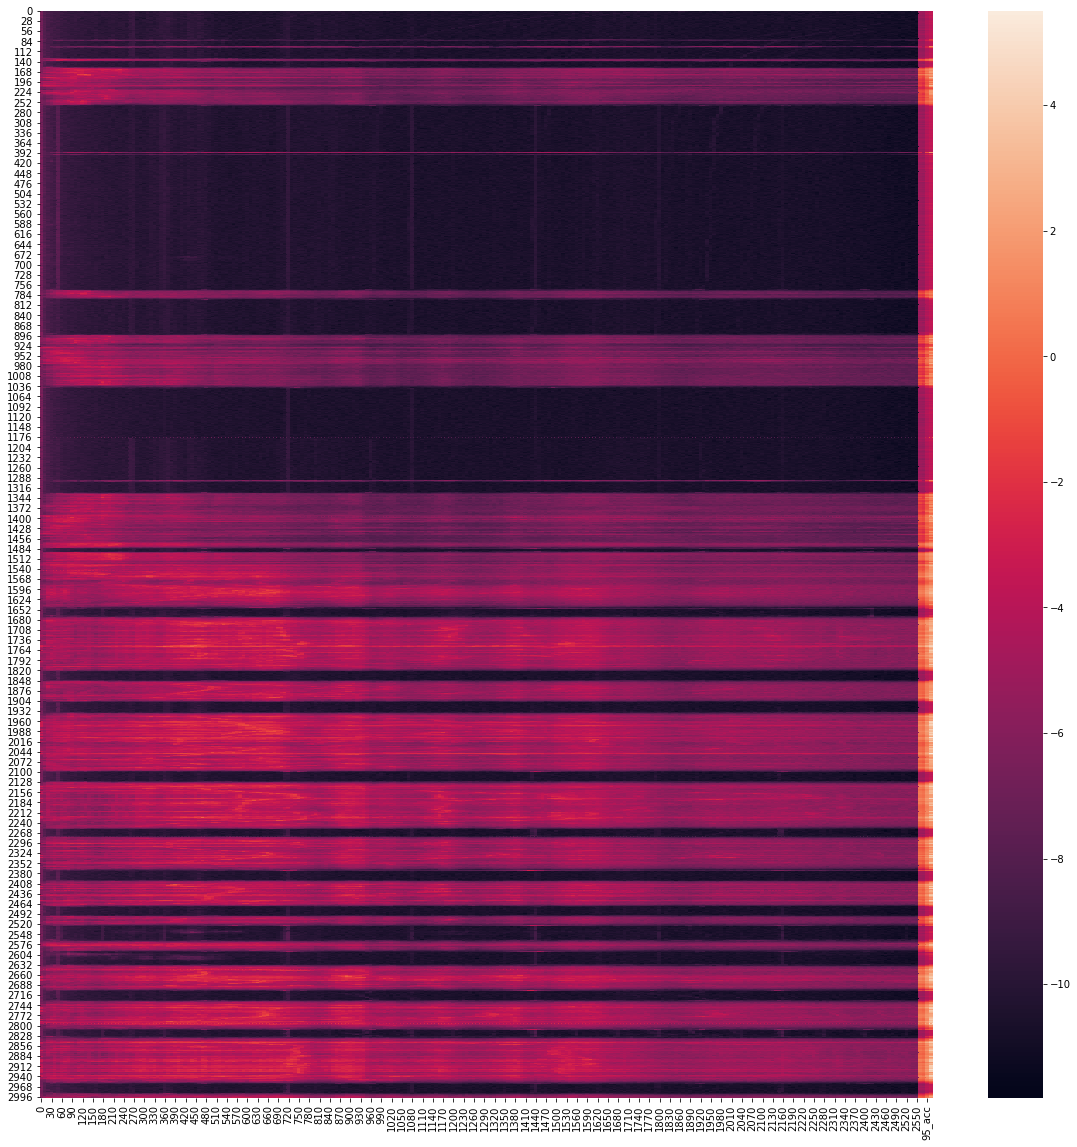

In [4]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(df))
plt.show()

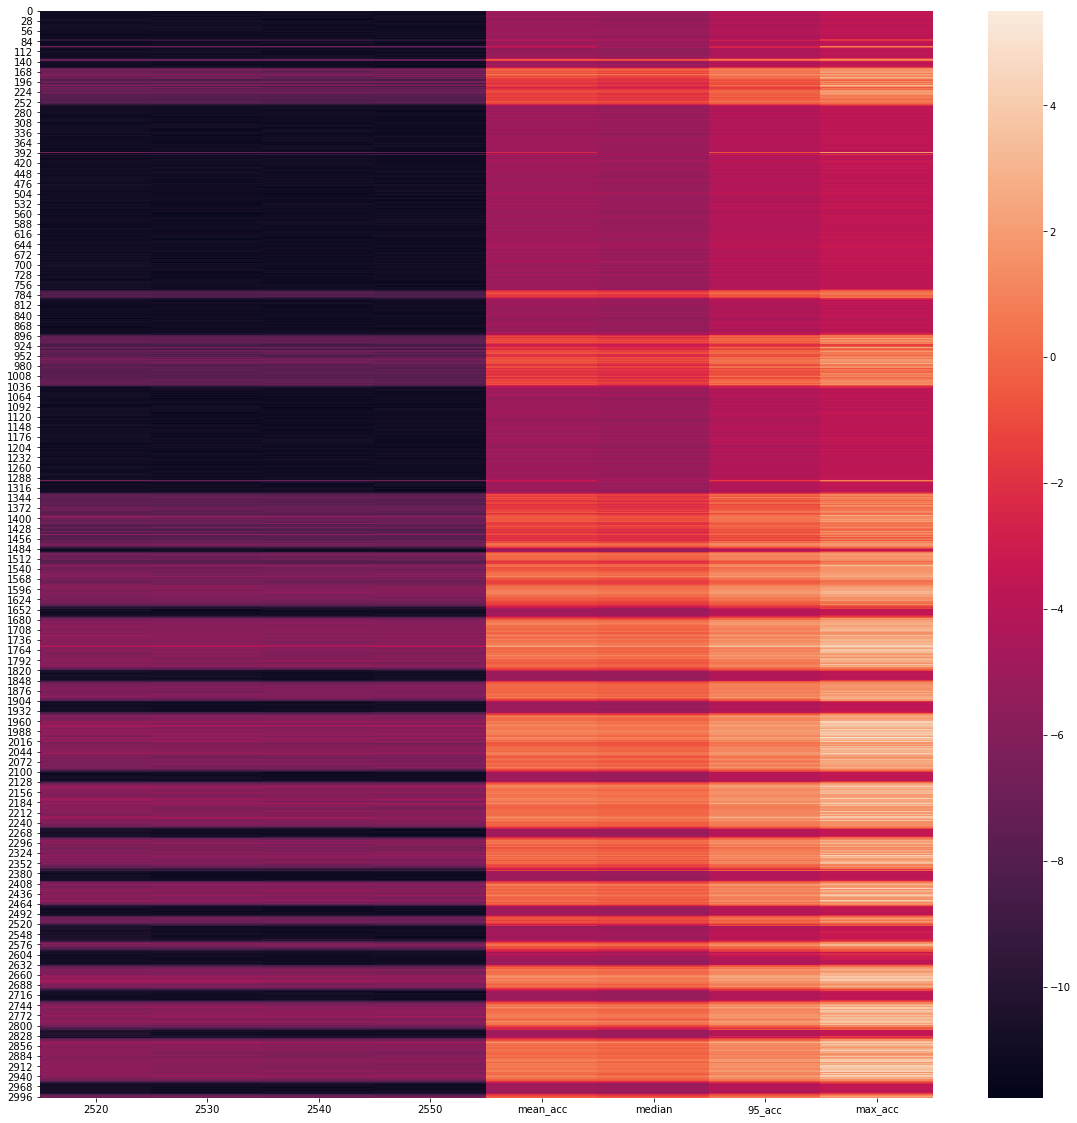

In [5]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(df.iloc[:,-8:]))
plt.show()

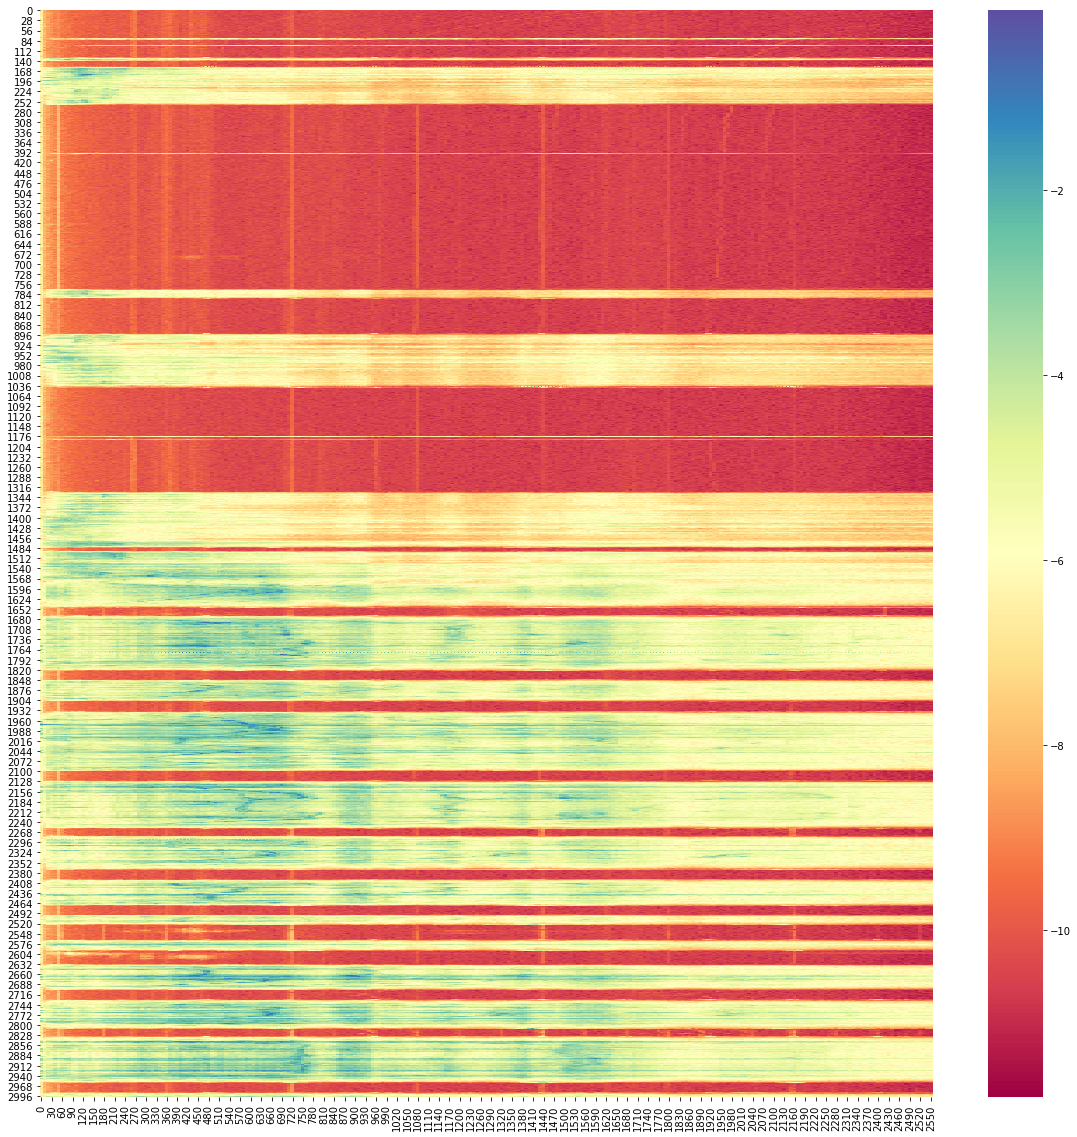

In [6]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(df.iloc[:,:-4]), cmap="Spectral")
plt.show()

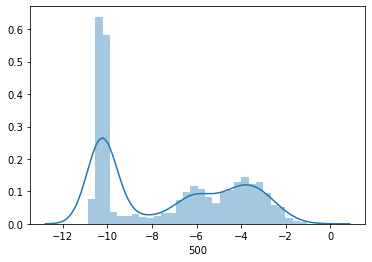

In [7]:
sb.distplot(np.log(df.iloc[:,50]), bins=30)

In [8]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components =2).fit(np.log(df))

In [9]:
gm_lab = GaussianMixture(n_components =2).fit_predict(np.log(df))

In [10]:
df_1 = np.log(df.iloc[:,:-4])
df_2 = pd.merge(df_1, df.iloc[:,-4:], how="left", left_index=True, right_index=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 6.1 MB


In [11]:
df_2.head()

0        10        20        30        40        50        60  \
0 -6.432400 -7.705316 -8.159457 -8.695907 -8.798867 -8.973598 -9.155581   
1 -6.343353 -8.202222 -8.288324 -8.733744 -8.758857 -9.029783 -9.117586   
2 -6.579502 -8.151169 -8.674175 -8.753178 -9.144018 -9.042246 -9.292144   
3 -6.633545 -8.348220 -8.615026 -8.842970 -8.920612 -8.887922 -9.420899   
4 -6.385505 -8.229333 -8.527355 -8.582049 -8.974374 -8.364595 -8.342809   

         70        80        90  ...       2500       2510       2520  \
0 -9.125464 -9.138675 -9.483421  ... -10.739949 -11.131481 -10.913985   
1 -9.262326 -9.492630 -9.360190  ... -10.861956 -11.077028 -10.843307   
2 -9.256351 -9.298835 -9.200838  ... -10.792298 -10.667660 -10.854668   
3 -8.956641 -9.599339 -9.496399  ... -10.728559 -10.986316 -10.947873   
4 -9.171922 -9.380465 -8.943294  ... -10.962166 -10.995358 -11.152004   

        2530       2540       2550  mean_acc    median    95_acc   max_acc  
0 -11.053323 -11.013247 -10.701382  0.007904  0.006931  0.018558  0.028211  
1 -11.028347 -10.646842 -11.171654  0.008869  0.008714  0.017975  0.027030  
2 -11.156287 -11.064431 -11.459926  0.007368  0.006656  0.016424  0.025582  
3 -11.204518 -10.589497 -11.080963  0.006382  0.005798  0.014314  0.023695  
4 -10.998012 -10.748530 -10.971057  0.007763  0.007311  0.016251  0.028942  

[5 rows x 260 columns]

In [12]:
df_2["gm_lab"] = (gm_lab *5) - 10

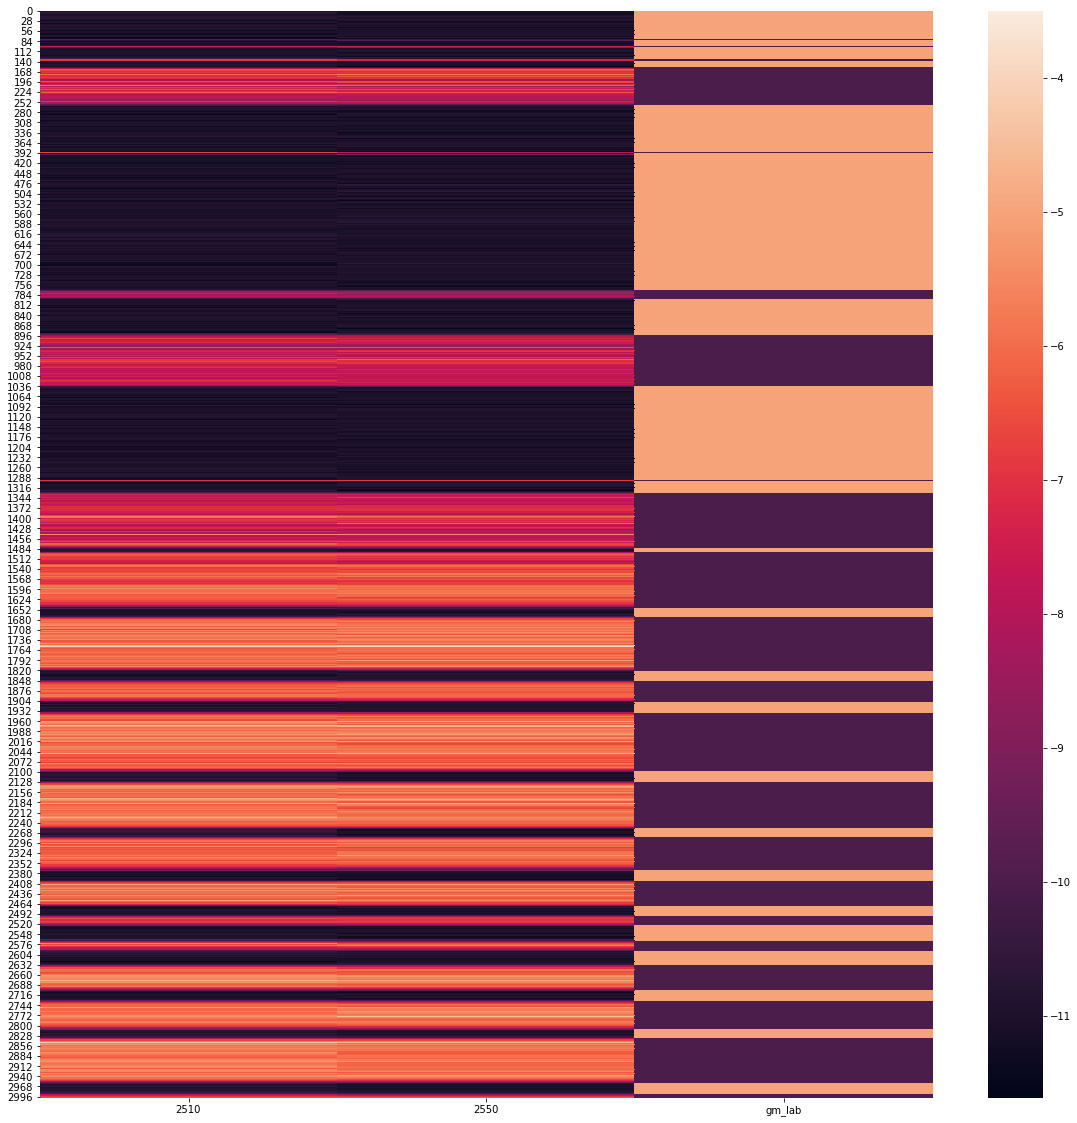

In [13]:
plt.figure(figsize=(20,20))
sb.heatmap(df_2.iloc[:, [-10, -6, -1]])
plt.show()

In [14]:
moving = df_2[df_2["gm_lab"] == -5]
moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 2989
Columns: 261 entries, 0 to gm_lab
dtypes: float64(260), int64(1)
memory usage: 2.8 MB


In [15]:
stopped = df_2[df_2["gm_lab"] != -5]
stopped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 79 to 2999
Columns: 261 entries, 0 to gm_lab
dtypes: float64(260), int64(1)
memory usage: 3.2 MB


In [16]:
stopped.mean()

0           -5.674600
10          -5.768962
20          -5.175203
30          -5.027423
40          -4.750704
              ...    
mean_acc     0.994274
median       0.770554
95_acc       2.633595
max_acc     13.055833
gm_lab     -10.000000
Length: 261, dtype: float64

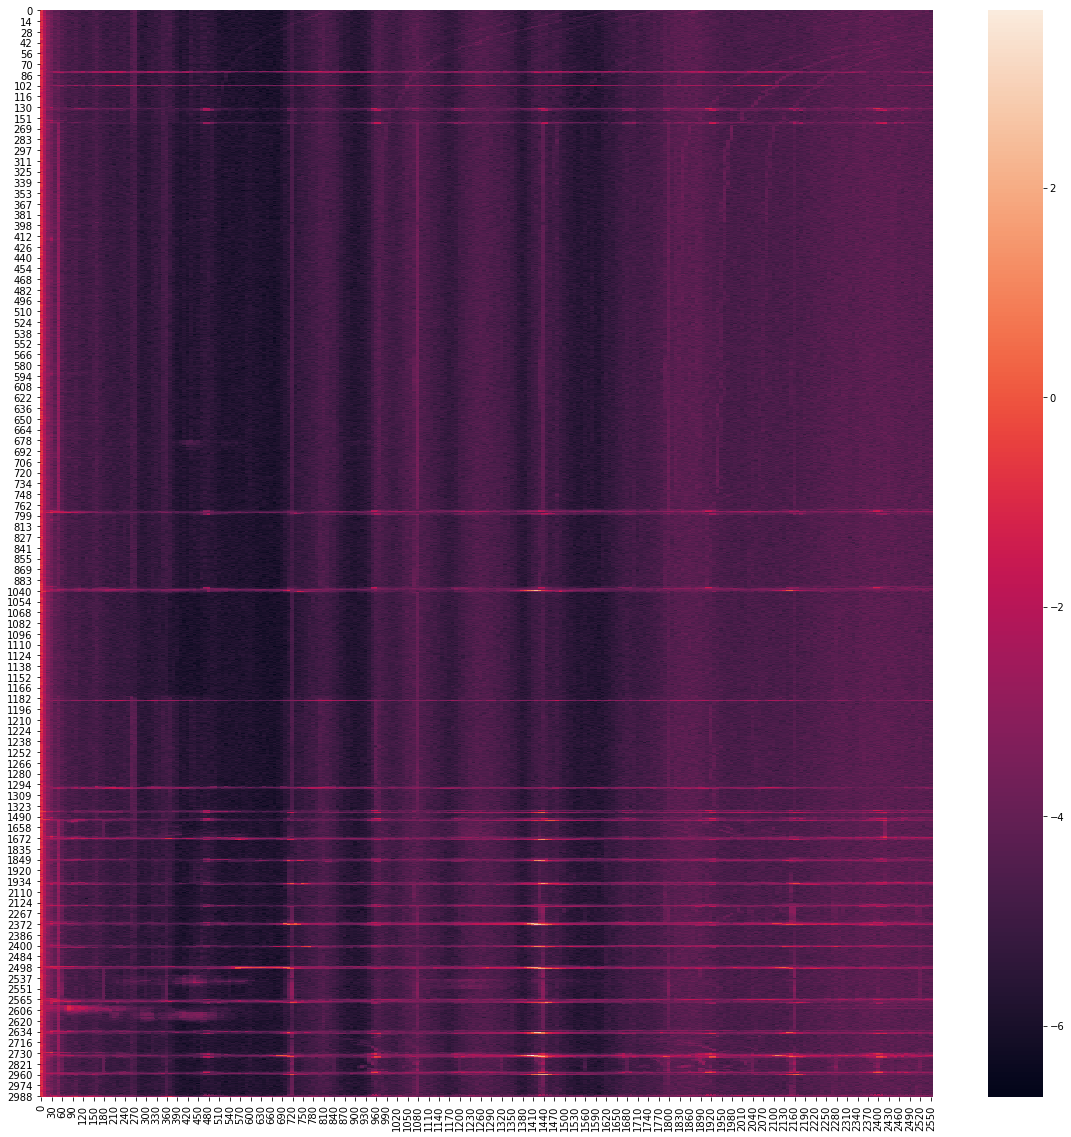

In [17]:
plt.figure(figsize=(20,20))
sb.heatmap((moving - stopped.mean()).iloc[:,:-5])
plt.show()


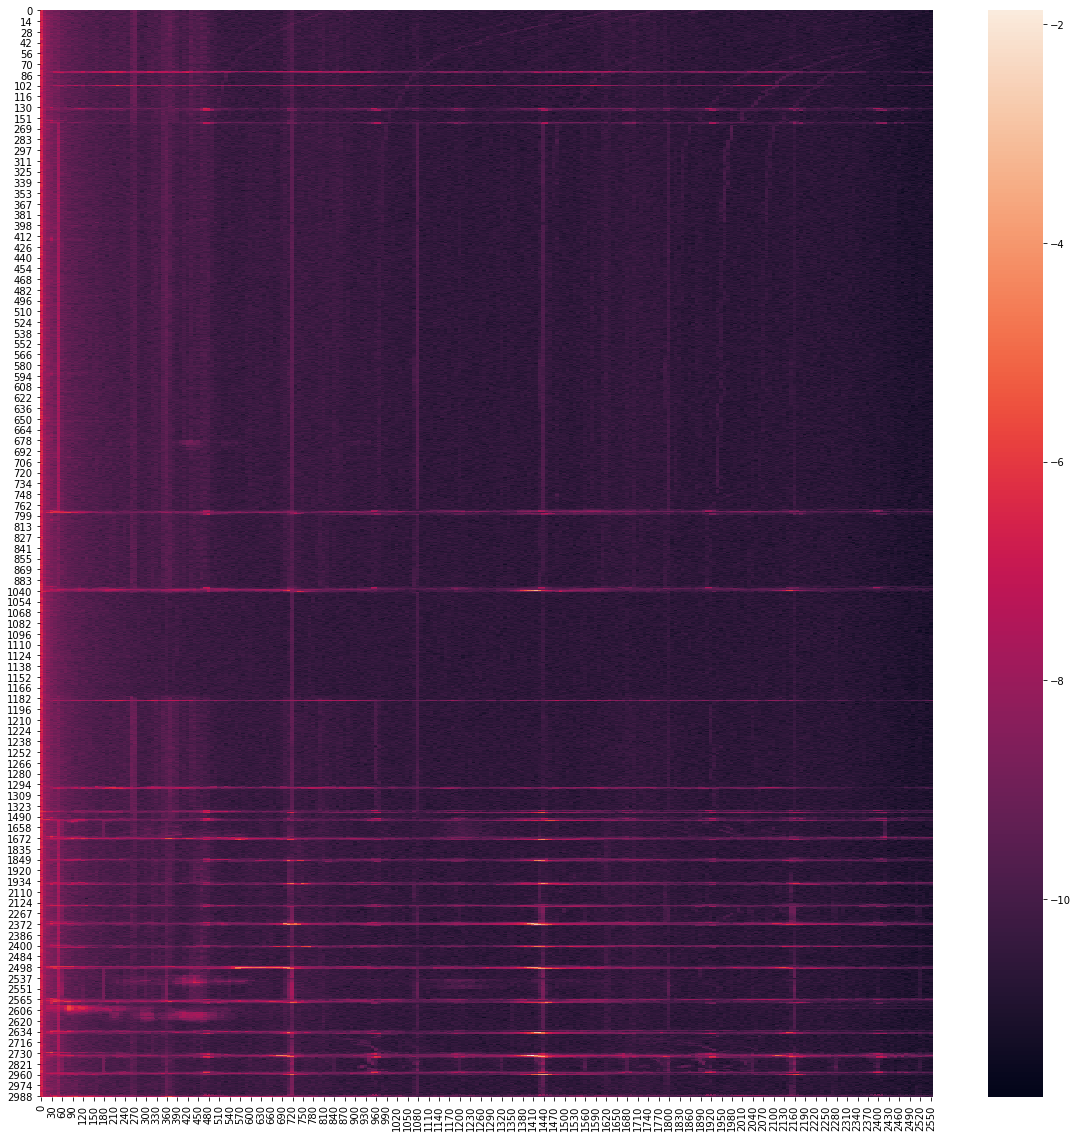

In [18]:
plt.figure(figsize=(20,20))
sb.heatmap(moving.iloc[:,:-5])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


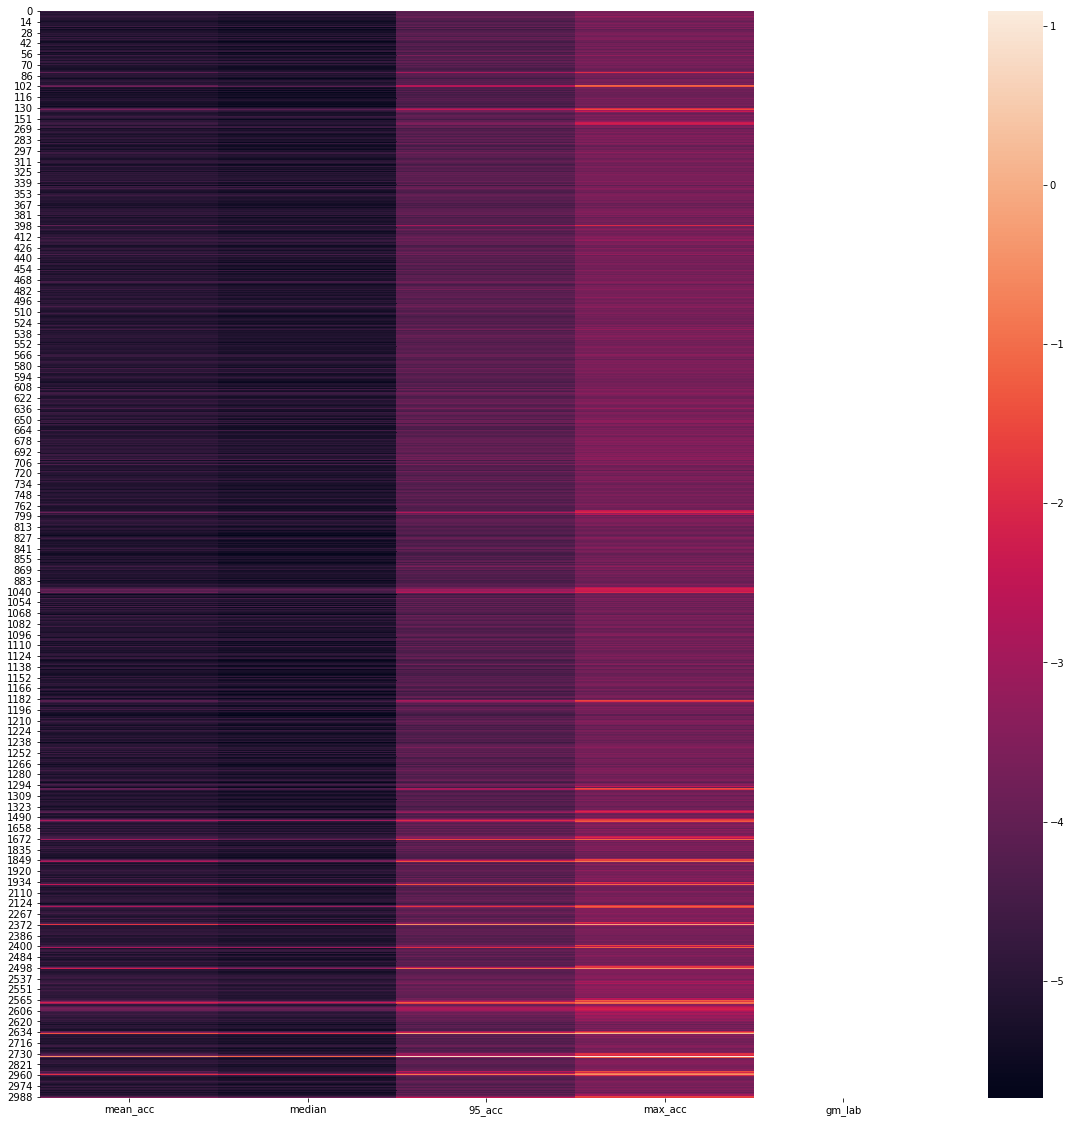

In [19]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(moving.iloc[:,-5:]))
plt.show()

In [20]:
from sklearn.cluster import KMeans as km
five = km(n_clusters=5, random_state=42).fit(moving)

In [21]:
five.labels_.mean()

0.2062146892655367

In [22]:
new_col = {"km_5":five.labels_}

In [23]:
new_col_series  = pd.DataFrame(new_col)

In [24]:
m2 = moving.copy()

In [25]:
m3 = m2.copy()

In [26]:
m3["km_5"] = five.labels_

In [39]:
m3.head()
m3 = m3.reset_index()
s2 = stopped.reset_index()
s2.head()

index         0        10        20        30        40        50  \
0     79 -6.685597 -7.939254 -8.133849 -7.469083 -7.738970 -7.700256   
1     80 -6.176430 -7.591610 -8.502793 -8.379553 -8.621745 -8.748256   
2     99 -6.621790 -7.690567 -8.599774 -8.617513 -8.833418 -8.746410   
3    100 -6.815263 -8.007535 -8.373339 -7.386696 -7.795455 -7.368502   
4    134 -6.645441 -7.189473 -4.860163 -3.998196 -4.139655 -4.304809   

         60        70        80  ...      2510      2520       2530  \
0 -7.410039 -8.016524 -7.355096  ... -7.484023 -7.802886  -7.563128   
1 -8.490325 -8.881222 -9.046051  ... -9.871466 -9.886118 -10.030674   
2 -9.298660 -9.024391 -9.144428  ... -7.713597 -7.669302  -7.278371   
3 -7.903300 -7.562641 -7.167564  ... -7.530727 -6.958794  -6.637480   
4 -5.105206 -4.804980 -4.252042  ... -8.658524 -8.744117  -8.281455   

        2540       2550  mean_acc    median    95_acc   max_acc  gm_lab  
0  -7.423968  -7.109800  0.042102  0.006799  0.210756  1.812297     -10  
1 -10.068692 -10.321993  0.011511  0.010020  0.026639  0.166792     -10  
2  -7.242507  -7.224614  0.019767  0.008487  0.079453  0.853727     -10  
3  -6.677418  -7.426671  0.028461  0.005615  0.073157  2.510635     -10  
4  -8.301996  -8.945999  0.172015  0.139719  0.439708  1.570160     -10  

[5 rows x 262 columns]

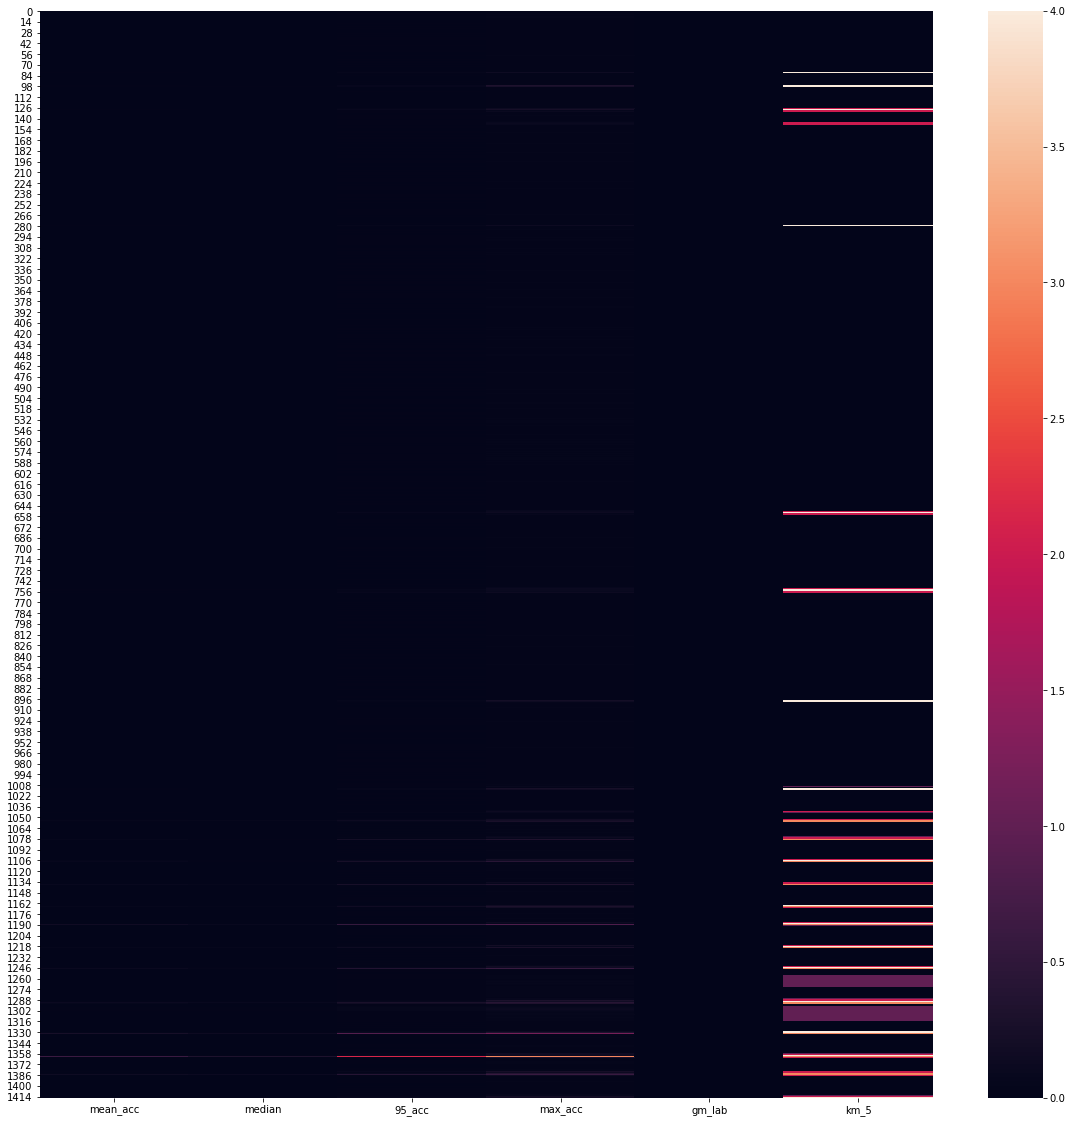

In [28]:
plt.figure(figsize=(20,20))
sb.heatmap(m3.iloc[:,-6:], vmin=0, vmax=4)
plt.show()

In [29]:
rebuild = pd.concat([m3, s2])

In [30]:
rebuild.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 1583
Columns: 263 entries, index to km_5
dtypes: float64(261), int64(2)
memory usage: 6.0 MB


In [31]:
rebuild.head()

index         0        10        20        30        40        50  \
0      0 -6.432400 -7.705316 -8.159457 -8.695907 -8.798867 -8.973598   
1      1 -6.343353 -8.202222 -8.288324 -8.733744 -8.758857 -9.029783   
2      2 -6.579502 -8.151169 -8.674175 -8.753178 -9.144018 -9.042246   
3      3 -6.633545 -8.348220 -8.615026 -8.842970 -8.920612 -8.887922   
4      4 -6.385505 -8.229333 -8.527355 -8.582049 -8.974374 -8.364595   

         60        70        80  ...       2520       2530       2540  \
0 -9.155581 -9.125464 -9.138675  ... -10.913985 -11.053323 -11.013247   
1 -9.117586 -9.262326 -9.492630  ... -10.843307 -11.028347 -10.646842   
2 -9.292144 -9.256351 -9.298835  ... -10.854668 -11.156287 -11.064431   
3 -9.420899 -8.956641 -9.599339  ... -10.947873 -11.204518 -10.589497   
4 -8.342809 -9.171922 -9.380465  ... -11.152004 -10.998012 -10.748530   

        2550  mean_acc    median    95_acc   max_acc  gm_lab  km_5  
0 -10.701382  0.007904  0.006931  0.018558  0.028211      -5   0.0  
1 -11.171654  0.008869  0.008714  0.017975  0.027030      -5   0.0  
2 -11.459926  0.007368  0.006656  0.016424  0.025582      -5   0.0  
3 -11.080963  0.006382  0.005798  0.014314  0.023695      -5   0.0  
4 -10.971057  0.007763  0.007311  0.016251  0.028942      -5   0.0  

[5 rows x 263 columns]

In [32]:
rebuild.tail()

index         0        10        20        30        40        50  \
1579   2995 -6.498562 -6.834860 -6.363790 -6.122801 -5.925560 -5.365560   
1580   2996 -6.675462 -6.741983 -6.013141 -5.986844 -5.640073 -5.472162   
1581   2997 -5.957932 -5.700911 -5.758917 -5.854626 -5.749694 -5.494728   
1582   2998 -5.969417 -6.688488 -5.325905 -5.526472 -5.133934 -5.148934   
1583   2999 -6.174319 -4.919563 -3.998744 -4.430896 -4.569854 -4.774120   

            60        70        80  ...      2520      2530      2540  \
1579 -5.552582 -5.547975 -4.878610  ... -6.985988 -7.296745 -7.272821   
1580 -5.804453 -5.112846 -5.295699  ... -7.055684 -6.687349 -6.659783   
1581 -5.079535 -5.093184 -5.153665  ... -6.732735 -6.466902 -6.812819   
1582 -5.413632 -5.010890 -4.662281  ... -6.693184 -6.652176 -6.596138   
1583 -4.729261 -5.085233 -5.573857  ... -6.783546 -6.534371 -6.793560   

          2550  mean_acc    median    95_acc   max_acc  gm_lab  km_5  
1579 -7.238826  0.258532  0.216923  0.645128  1.247276     -10   NaN  
1580 -6.847222  0.289689  0.238295  0.719797  2.224413     -10   NaN  
1581 -6.927297  0.506372  0.383552  1.324392  8.712835     -10   NaN  
1582 -6.623749  0.601653  0.486621  1.525946  3.654169     -10   NaN  
1583 -6.303416  0.714595  0.563515  1.880696  4.497925     -10   NaN  

[5 rows x 263 columns]

In [34]:
r2 = rebuild.set_index("index")
r2 = r2.sort_index()
# r2 = r2.drop("level_0", axis =1)
r2.km_5 = r2.km_5.fillna(-1)
r2.gm_lab = (r2.gm_lab + 10 ) / 5

In [35]:
r2.head()

0        10        20        30        40        50        60  \
index                                                                         
0     -6.432400 -7.705316 -8.159457 -8.695907 -8.798867 -8.973598 -9.155581   
1     -6.343353 -8.202222 -8.288324 -8.733744 -8.758857 -9.029783 -9.117586   
2     -6.579502 -8.151169 -8.674175 -8.753178 -9.144018 -9.042246 -9.292144   
3     -6.633545 -8.348220 -8.615026 -8.842970 -8.920612 -8.887922 -9.420899   
4     -6.385505 -8.229333 -8.527355 -8.582049 -8.974374 -8.364595 -8.342809   

             70        80        90  ...       2520       2530       2540  \
index                                ...                                    
0     -9.125464 -9.138675 -9.483421  ... -10.913985 -11.053323 -11.013247   
1     -9.262326 -9.492630 -9.360190  ... -10.843307 -11.028347 -10.646842   
2     -9.256351 -9.298835 -9.200838  ... -10.854668 -11.156287 -11.064431   
3     -8.956641 -9.599339 -9.496399  ... -10.947873 -11.204518 -10.589497   
4     -9.171922 -9.380465 -8.943294  ... -11.152004 -10.998012 -10.748530   

            2550  mean_acc    median    95_acc   max_acc  gm_lab  km_5  
index                                                                   
0     -10.701382  0.007904  0.006931  0.018558  0.028211     1.0   0.0  
1     -11.171654  0.008869  0.008714  0.017975  0.027030     1.0   0.0  
2     -11.459926  0.007368  0.006656  0.016424  0.025582     1.0   0.0  
3     -11.080963  0.006382  0.005798  0.014314  0.023695     1.0   0.0  
4     -10.971057  0.007763  0.007311  0.016251  0.028942     1.0   0.0  

[5 rows x 262 columns]

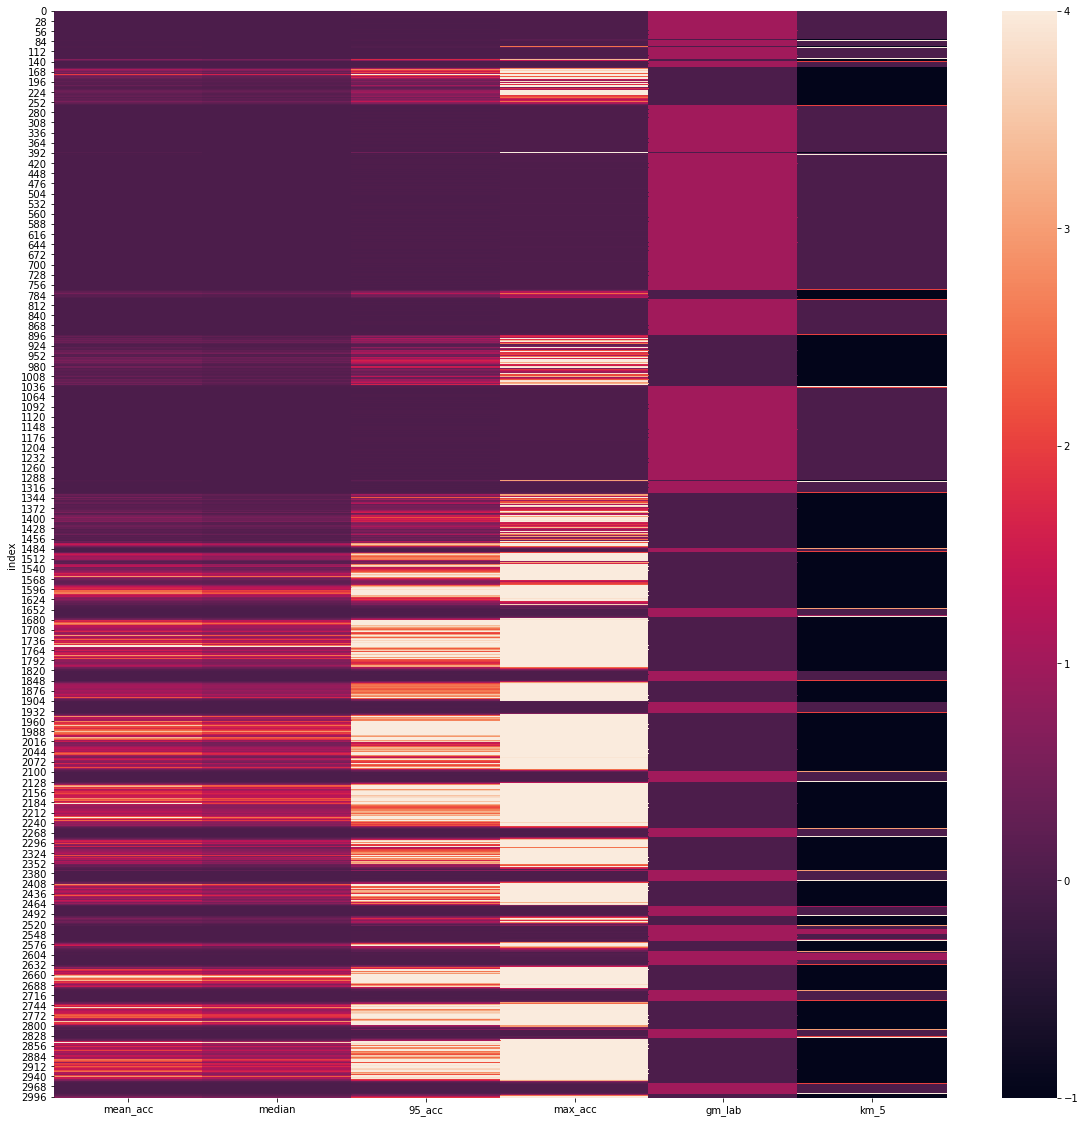

In [36]:
plt.figure(figsize=(20,20))
sb.heatmap(r2.iloc[:,-6:], vmin=-1, vmax=4)
plt.show()

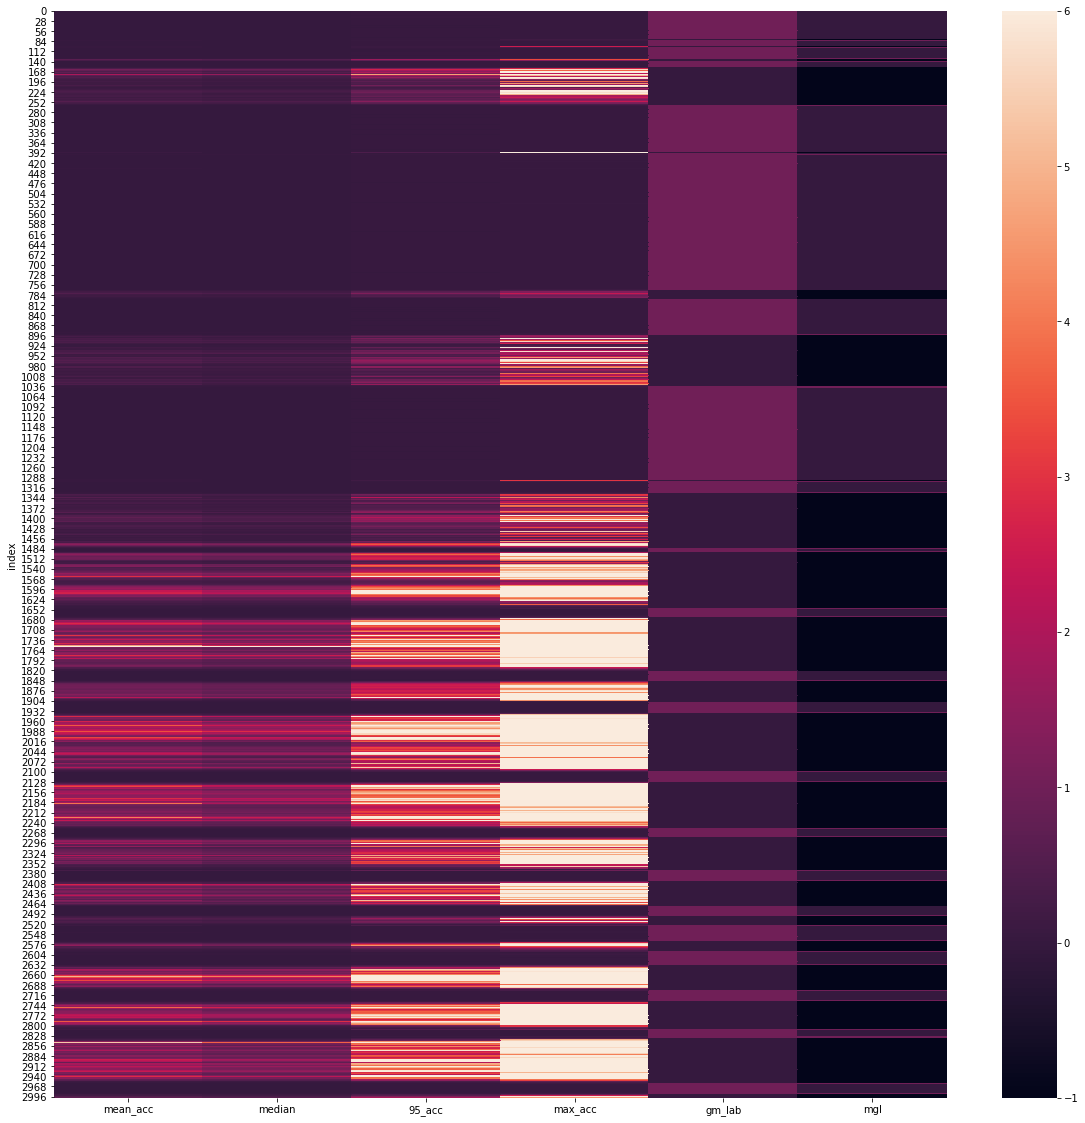

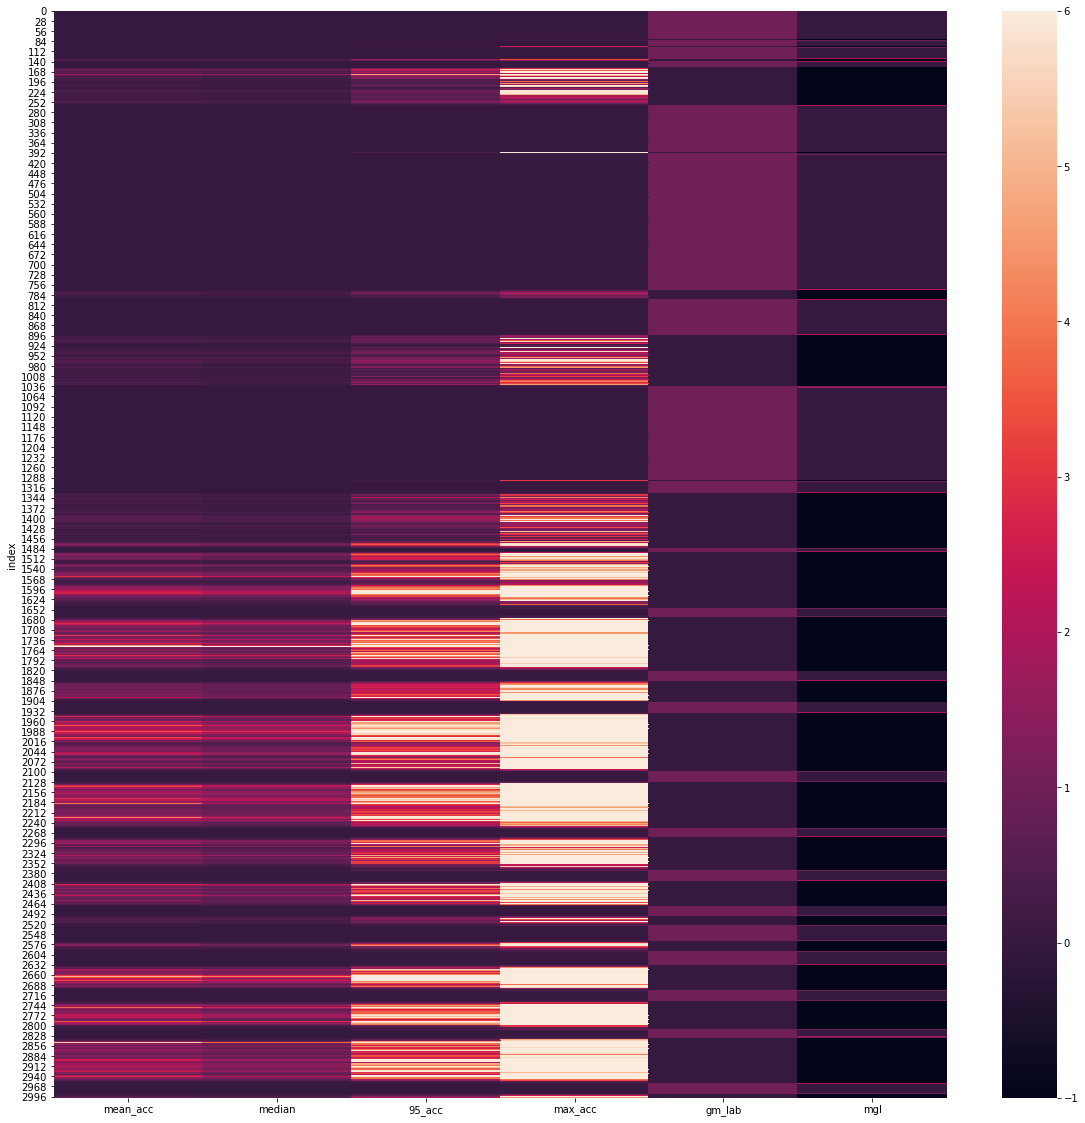

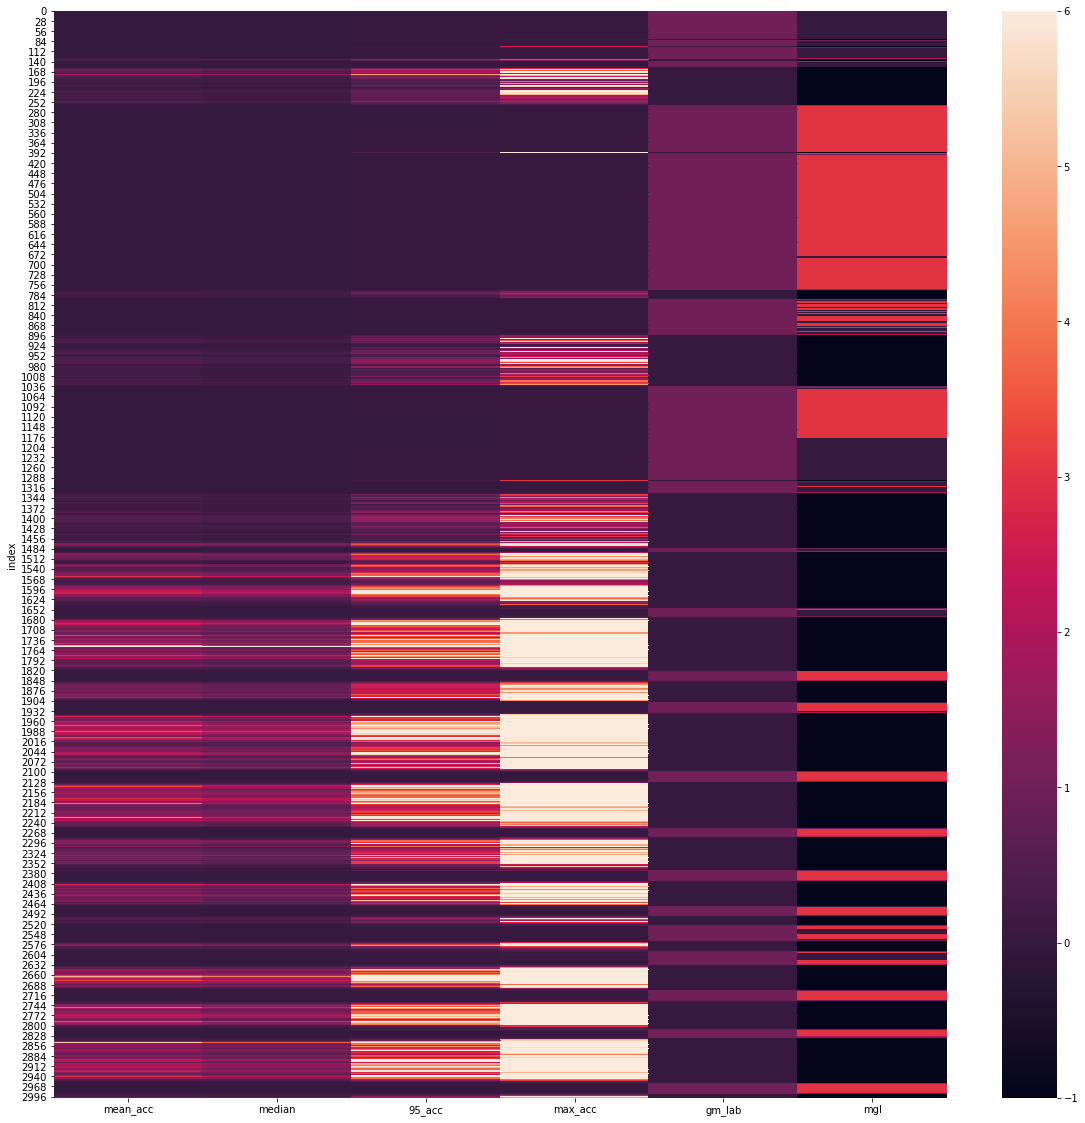

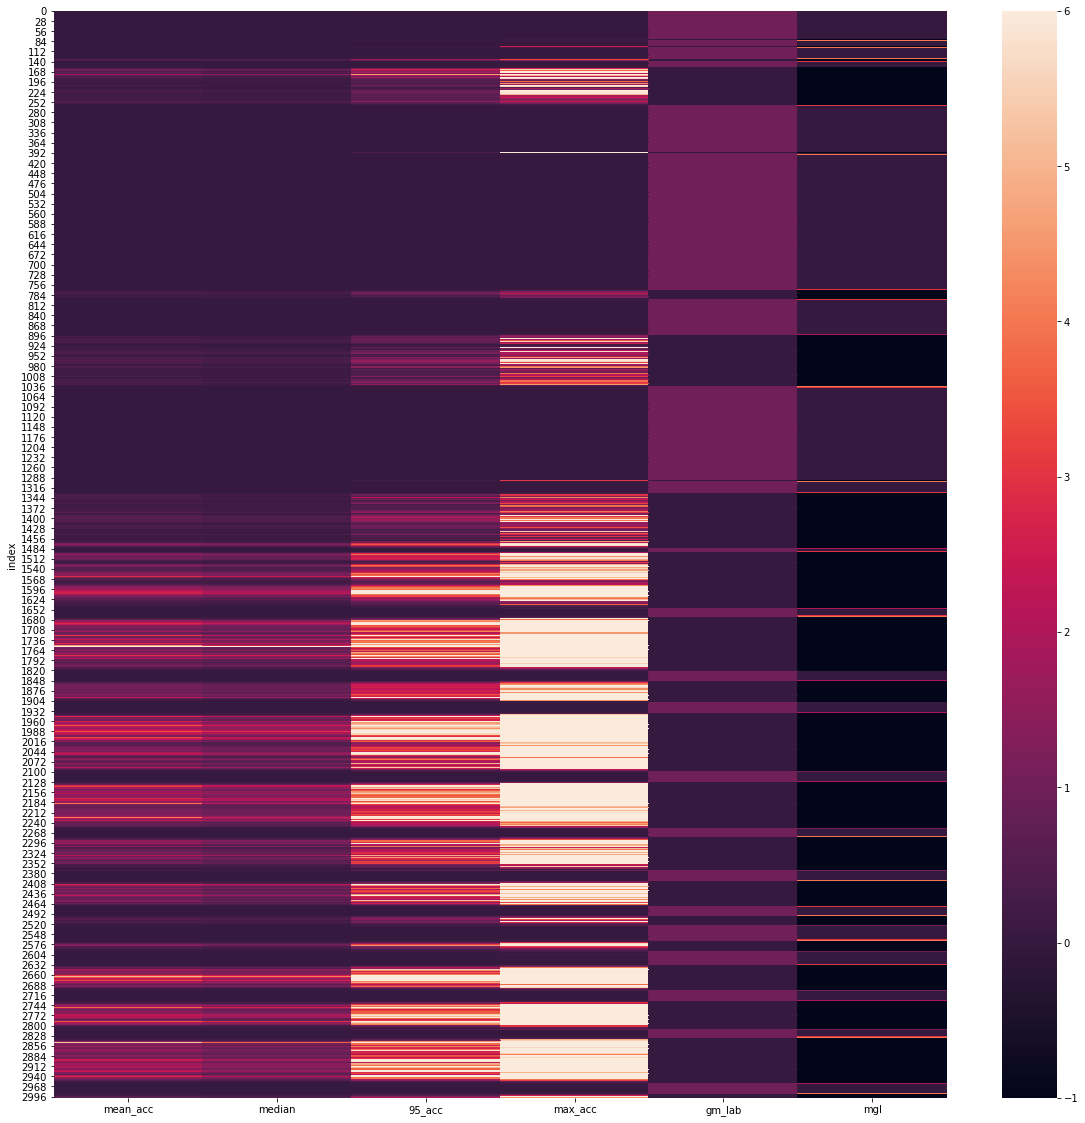

In [40]:
for i in np.arange(2, 6):
    gml = GaussianMixture(n_components = i).fit_predict(m2)
    m4 = m2.reset_index()
    m4["mgl"] = gml
#     print(m4.head())
    r1 = pd.concat([m4, s2])
#     print(r1.head())
    r1 = r1.set_index("index")
    r1 = r1.sort_index()
#     r1 = r1.drop("level_0", axis =1)
#     print(r1.head())
    r1.mgl = r1.mgl.fillna(-1)
    r1.gm_lab = (r1.gm_lab + 10 ) / 5
    plt.figure(figsize=(20,20))
    sb.heatmap(r1.iloc[:,-6:], vmin=-1, vmax=6)
    plt.show()